# Báo cáo tiến độ giữa kỳ 
## Nhóm 25
### Thành viên
- Nguyễn Xuân Tùng 20215162
- Nguyễn Văn Đăng 20215033
- Nguyễn Văn Thế Bách 20214993
- Đinh Huy Dương 20215020

## Mô tả bài toán 
Bài toán máy hút bụi: Máy hút bụi sẽ tự động tìm hạt bụi trong một căn phòng và làm sạch 

## Phương pháp
Mô hình hóa: 
- Máy sẽ làm việc trên một ma trận m x n
- Ô của ma trận mang giá trị 1 sẽ là chướng ngại vật
- Ví dụ ma trận: Ô trái trên cùng sẽ mang tọa độ (0,0); ô phải dưới cùng sẽ mang tọa độ (3,3). 

<center>

| 0 | 0 | 0 | 0 |
| --- | --- | --- | --- |
| 0 | 1 | 1 | 0 |
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |

</center>

* Chướng ngại vật ở các ô có tọa độ 
    * (1,1)
    * (1,2)
    * (2,3)
    * (3,0) 
    * (3,1)

- Mục tiêu bài toán: Đặt hạt bụi ở ở một ô (goal), và máy hút bụi sẽ tránh chướng ngại vật và tìm đường đi đến hạt bụi
- Máy hút bụi sẽ di chuyển lên, xuống, trái, phải, không đi chéo
- Máy hút bụi sẽ sử dụng thuật toán A* và DFS để tìm được đường đi

### Mô phỏng thuật toán A*

- Điểm bắt đầu (start): (0, 0)
- Điểm kết thúc (goal): (3, 3)

In [1]:
class Node:
  def __init__(self, position, parent=None, g=0, h=0):
    self.position = position
    self.parent = parent
    self.g = g  # Cost from start to current node
    self.h = h  # Heuristic estimate of cost to goal
    self.f = self.g + self.h  # Total cost (f(n))

def heuristic_Manhattan(current, goal):
  # Manhattan distance heuristic (estimate to reach goal)
  return abs(current.position[0] - goal.position[0]) + abs(current.position[1] - goal.position[1])

def heuristic_Euclidean(current, goal):
  # Euclidean distance heuristic (estimate to reach goal)
  return ((current.position[0] - goal.position[0])**2 + (current.position[1] - goal.position[1])**2)**0.5

def a_star_Mahattan(maze, start, goal):
    open_set = []  # Nodes to be explored (priority queue)
    closed_set = set()  # Explored nodes
    start_node = Node(start)
    open_set.append(start_node)

    while open_set:
        current = min(open_set, key=lambda x: x.f)  # Get node with lowest f(n)
        open_set.remove(current)
        closed_set.add(current.position)

        if current.position == goal:
            path = []
            while current:
                path.append(current.position)
                current = current.parent
            return path[::-1]  # Reverse path for start to goal

        for neighbor in get_neighbors(current, maze):
            if neighbor in closed_set:
                continue
            tentative_g = current.g + 1  # Cost of moving to neighbor

            # Check if neighbor is in open_set
            for node in open_set:
                if node.position == neighbor:
                    new_node = node
                    break
            else:
                new_node = Node(neighbor, current, tentative_g)
                open_set.append(new_node)

            if tentative_g < new_node.g:
                new_node.parent = current
                new_node.g = tentative_g
                new_node.h = heuristic_Manhattan(new_node, Node(goal))
                new_node.f = new_node.g + new_node.h

    return None  # No path found

def a_star_Euclidean(maze, start, goal):
    open_set = []  # Nodes to be explored (priority queue)
    closed_set = set()  # Explored nodes
    start_node = Node(start)
    open_set.append(start_node)

    while open_set:
        current = min(open_set, key=lambda x: x.f)  # Get node with lowest f(n)
        open_set.remove(current)
        closed_set.add(current.position)

        if current.position == goal:
            path = []
            while current:
                path.append(current.position)
                current = current.parent
            return path[::-1]  # Reverse path for start to goal

        for neighbor in get_neighbors(current, maze):
            if neighbor in closed_set:
                continue
            tentative_g = current.g + 1  # Cost of moving to neighbor

            # Check if neighbor is in open_set
            for node in open_set:
                if node.position == neighbor:
                    new_node = node
                    break
            else:
                new_node = Node(neighbor, current, tentative_g)
                open_set.append(new_node)

            if tentative_g < new_node.g:
                new_node.parent = current
                new_node.g = tentative_g
                new_node.h = heuristic_Euclidean(new_node, Node(goal))
                new_node.f = new_node.g + new_node.h

    return None  # No path found


# Helper functions to define maze structure, get neighbors, etc. (replace with your maze representation)
def get_neighbors(node, maze):
  x, y = node.position
  neighbors = [(nx, ny) for nx, ny in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)] 
                if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1]
  return neighbors 

def maze_representation():
  # Define your maze layout here using a 2D list or other suitable data structure
  # with characters representing walls and open spaces 
  pass

# Example Usage
maze = maze_representation()

def get_neighbors(node, maze):
  # Implement logic to get valid neighboring cells within the maze boundaries
  # based on node position and considering walls
  x, y = node.position
  neighbors = [(nx, ny) for nx, ny in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)] if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1]
  return neighbors  

def maze_representation():
  # Define your maze layout here using a 2D list or other suitable data structure
  # with characters representing walls and open spaces 
  return [
        [0, 0, 0, 0],
        [0, 1, 1, 0],
        [0, 0, 0, 1],
        [1, 1, 0, 0]
    ]


#### Visualization

In [2]:
import tkinter as tk
import PIL
from PIL import Image, ImageTk
def visualize_maze_tkinter(maze, path=None, start=None, goal=None):
    # Create a new Tkinter window
    window = tk.Tk()

    # Set the window size to 640x860
    window.geometry("640x640")

    # Calculate the size of each cell
    cell_size = 100
    width = len(maze[0]) * cell_size
    height = len(maze) * cell_size

    # Create a canvas to draw the maze
    canvas = tk.Canvas(window, width=width, height=height)
    canvas.pack()

    # "Load the robot image
    robot_image = Image.open("robot_icon.png")
    robot_image = robot_image.resize((cell_size, cell_size), Image.LANCZOS)  # Resize the image
    robot_icon = ImageTk.PhotoImage(robot_image)
    
    # Draw the maze
    for i, row in enumerate(maze):
        for j, cell in enumerate(row):
            x1 = j * cell_size
            y1 = i * cell_size
            x2 = x1 + cell_size
            y2 = y1 + cell_size
            color = 'white' if cell == 0 else 'black'
            canvas.create_rectangle(x1, y1, x2, y2, fill=color, outline="gray")  # Added outline for grid

    # Draw the start and goal positions
    if start:
        x1 = start[1] * cell_size
        y1 = start[0] * cell_size
        x2 = x1 + cell_size
        y2 = y1 + cell_size
        canvas.create_rectangle(x1, y1, x2, y2, fill='green')  # Start is green

    if goal:
        x1 = goal[1] * cell_size
        y1 = goal[0] * cell_size
        x2 = x1 + cell_size
        y2 = y1 + cell_size
        canvas.create_rectangle(x1, y1, x2, y2, fill='blue')  # Goal is blue

    # Draw the robot image at the start position
    if start:
        x = start[1] * cell_size + cell_size // 2
        y = start[0] * cell_size + cell_size // 2
        canvas.create_image(x, y, image = robot_icon)

    # Draw the path
    if path:
        for i in range(len(path)):
            x1 = path[i][1] * cell_size
            y1 = path[i][0] * cell_size
            x2 = x1 + cell_size
            y2 = y1 + cell_size
            canvas.create_rectangle(x1, y1, x2, y2, fill='red')

            # Determine direction and rotate image accordingly
            if i > 0:  # Skip for the first position
                dx = path[i][1] - path[i-1][1]
                dy = path[i][0] - path[i-1][0]
                if dx == 1:  # Moving right
                    angle = 0
                elif dx == -1:  # Moving left
                    angle = 180
                elif dy == 1:  # Moving down
                    angle = 90
                else:  # Moving up
                    angle = -90

                # Rotate and draw the robot image
                rotated_image = robot_image.rotate(angle)
                robot_icon = ImageTk.PhotoImage(rotated_image)
                x = path[i][1] * cell_size + cell_size // 2
                y = path[i][0] * cell_size + cell_size // 2
                canvas.create_image(x, y, image=robot_icon)


    # Start the Tkinter event loop
    window.mainloop()

# Example usage
maze = maze_representation()
start = (0, 0)
goal = (3, 3)
path = a_star_Mahattan(maze, start, goal)
visualize_maze_tkinter(maze, path, start, goal)

#### Result

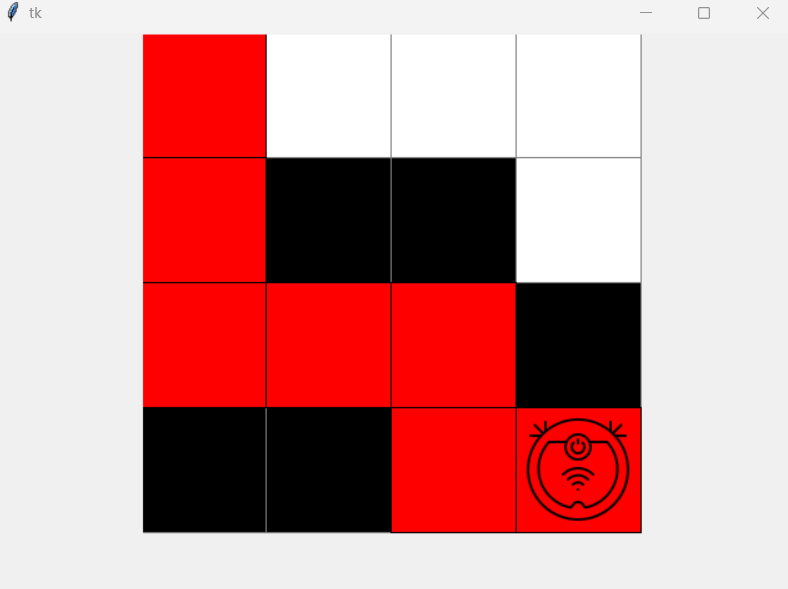

### DFS Demonstration

In [3]:
# Define the possible moves (up, right, down, left)
move = [
    [0,1],
    [1,0],
    [0,-1],
    [-1,0]
]

matrix = [
    [0, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0]
]

# Number of steps taken
path = []

def dfs(a, b, goal_a, goal_b, matrix):
    # Check if out of bounds or if cell is a wall
    if a < 0 or b < 0 or a >= len(matrix) or b >= len(matrix[0]) or matrix[a][b] == 1:
        return

    # If goal is reached
    if a == goal_a and b == goal_b:
        print("Success")
        return

    # Mark the cell as visited
    matrix[a][b] = 1

    # Explore neighbors
    for i in range(4):
        path.append([a + move[i][0],b + move[i][1]])
        dfs(a + move[i][0], b + move[i][1], goal_a, goal_b, matrix)

    # Unmark the cell (backtracking)
    matrix[a][b] = 0



# Call the function
dfs(0, 0, 3, 3, matrix)

print(len(path))


Success
40


### Đánh giá hiệu năng

In [4]:
import time
import matplotlib.pyplot as plt

steps_mahattan = []
steps_euclidean = []
steps_dfs = []

maze1 = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0] 
]

maze2 = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0]
]

maze3 = [
    [0, 1, 0, 1, 0, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0]
]
    

# Mahattan Heuristic
path_mahattan = a_star_Mahattan(maze, start, goal)   
steps_mahattan.append(len(path_mahattan) -1)

path_mahattan = a_star_Mahattan(maze1, start, goal)
steps_mahattan.append(len(path_mahattan) -1)

path_mahattan = a_star_Mahattan(maze2, start, goal)
steps_mahattan.append(len(path_mahattan) -1)

path_mahattan = a_star_Mahattan(maze3, start, goal)
steps_mahattan.append(len(path_mahattan) -1)

# Euclidean Heuristic
path_euclidean = a_star_Euclidean(maze, start, goal)
steps_euclidean.append(len(path_euclidean) -1)

path_euclidean = a_star_Euclidean(maze1, start, goal)
steps_euclidean.append(len(path_euclidean) -1)

path_euclidean = a_star_Euclidean(maze2, start, goal)
steps_euclidean.append(len(path_euclidean) -1)

path_euclidean = a_star_Euclidean(maze3, start, goal)
steps_euclidean.append(len(path_euclidean) -1)

# DFS
path = []
dfs(0, 0, 3, 3, maze)
steps_dfs.append(len(path))

path = []
dfs(0, 0, 4, 4, maze1)
steps_dfs.append(len(path))

path = []
dfs(0, 0, 4, 4, maze2)
steps_dfs.append(len(path))

path = []
dfs(0, 0, 4, 5, maze3)
steps_dfs.append(len(path))

# Plot the results

plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))

# Plot steps for each maze
plt.plot(steps_mahattan, marker='o', label='A* Manhattan')
plt.plot(steps_euclidean, marker='x', label='A* Euclidean')
plt.plot(steps_dfs, marker='D', label='DFS')

plt.title('Steps Taken by Algorithms')
plt.xlabel('Maze')
plt.ylabel('Steps')
plt.xticks(range(3), ['maze', 'maze1', 'maze2', 'maze3'])
plt.legend()

plt.tight_layout()
plt.show()


plt.tight_layout()

TypeError: object of type 'NoneType' has no len()

### Hạn chế cần khắc phục 

Chỉ có thể tìm được đường đi đến một hạt bụi, chưa cho phép tìm được đường đi để clear >= 2 hạt tối ưu